In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape =', x_train.shape, ', train label shape =', t_train.shape)
print(' test shape =', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label =', t_train)
print('\n test label =', t_test)


 train shape = (60000, 28, 28) , train label shape = (60000,)
 test shape = (10000, 28, 28) , test label shape = (10000,)

 train label = [9 0 0 ... 3 0 5]

 test label = [9 2 1 ... 8 1 5]


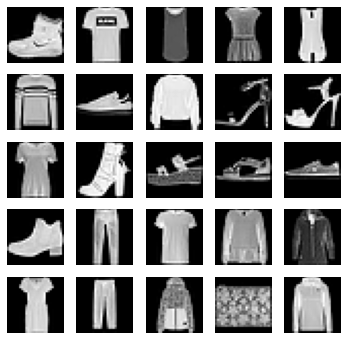

In [11]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25):

  plt.subplot(5, 5, index + 1)     # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')

plt.show()

In [12]:
# 학습, 테스트 데이터 정규화

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩 수행 X

# t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
# t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

MNIST는 정답 값이 0~9 이었지만 Fashion MNIST는 아니므로 10진수 형태 출력(원핫인코딩x) 

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))     # 28x28 이미지를 784의 1차원 벡터로 변환

model.add(tf.keras.layers.Dense(100,activation='relu'))    # 은닉층 노드수는 하이퍼 파라미터이므로 환경 맞게 임의 설정

model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])     # 정답을 원핫 인코딩 아니기에 loss = 'sparse_categorical_crossentropy'
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6960 - accuracy: 0.7622 - val_loss: 0.4359 - val_accuracy: 0.8444
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4058 - accuracy: 0.8542 - val_loss: 0.3914 - val_accuracy: 0.8626
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3611 - accuracy: 0.8679 - val_loss: 0.3730 - val_accuracy: 0.8680
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3384 - accuracy: 0.8761 - val_loss: 0.3652 - val_accuracy: 0.8706
Epoch 5/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3109 - accuracy: 0.8853 - val_loss: 0.3346 - val_accuracy: 0.8786
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2977 - accuracy: 0.8883 - val_loss: 0.3418 - val_accuracy: 0.8774
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.8950 - val_loss: 0.3374 - val_accuracy:

In [16]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8815


[0.40542569756507874, 0.8815000057220459]

MNIST에 비해 낮은 정확도

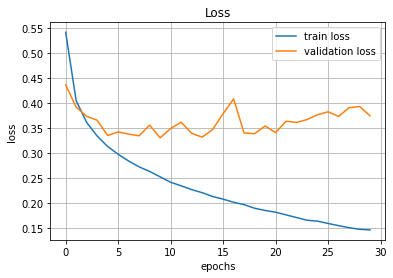

In [17]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

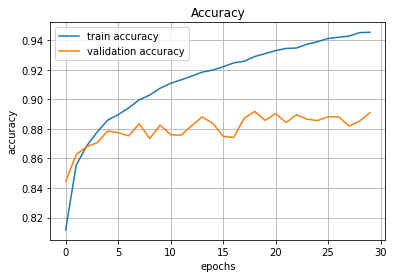

In [18]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

약 87% 이후 간격 벌어짐 => overfitting

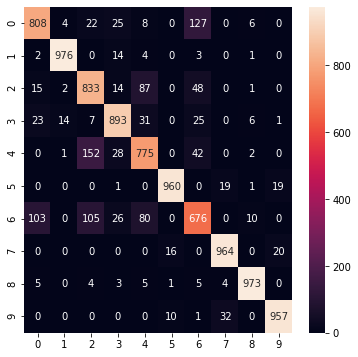

In [21]:
# 혼동행렬 (confusion matrix)
# 어떤 데이터 잘 맞추고 못 맞추는지

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value = model.predict(x_test)     # 예측값

# 정답과 예측값 비교
cm = confusion_matrix(t_test, np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [22]:
print(cm)
print('\n')

for i in range(10):
  print(('label = %d\t(%d/%d)\taccuracy =%.3f') %
        (i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i]) ))

[[808   4  22  25   8   0 127   0   6   0]
 [  2 976   0  14   4   0   3   0   1   0]
 [ 15   2 833  14  87   0  48   0   1   0]
 [ 23  14   7 893  31   0  25   0   6   1]
 [  0   1 152  28 775   0  42   0   2   0]
 [  0   0   0   1   0 960   0  19   1  19]
 [103   0 105  26  80   0 676   0  10   0]
 [  0   0   0   0   0  16   0 964   0  20]
 [  5   0   4   3   5   1   5   4 973   0]
 [  0   0   0   0   0  10   1  32   0 957]]


label = 0	(808/1000)	accuracy =0.808
label = 1	(976/1000)	accuracy =0.976
label = 2	(833/1000)	accuracy =0.833
label = 3	(893/1000)	accuracy =0.893
label = 4	(775/1000)	accuracy =0.775
label = 5	(960/1000)	accuracy =0.960
label = 6	(676/1000)	accuracy =0.676
label = 7	(964/1000)	accuracy =0.964
label = 8	(973/1000)	accuracy =0.973
label = 9	(957/1000)	accuracy =0.957
